In [46]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

from matplotlib import pyplot as plt
import matplotlib.colors as colors

from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [47]:
y_target = np.load("labels.npz")['a']
X_features = np.load("features.npz")['a']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state = 42)

In [49]:
model_gbm = GradientBoostingClassifier(n_estimators=500,
                                      learning_rate=0.1,
                                      max_depth=3,
                                      n_iter_no_change=20,
                                      verbose=1)

model_gbm.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.3361            3.30m
         2           1.3013            3.27m
         3           1.2667            3.28m
         4           1.2308            3.26m
         5           1.2034            3.26m
         6           1.1756            3.26m
         7           1.1446            3.25m
         8           1.1254            3.26m
         9           1.0978            3.24m
        10           1.0686            3.23m
        20           0.8730            3.15m
        30           0.7265            3.08m


GradientBoostingClassifier(n_estimators=500, n_iter_no_change=20, verbose=1)

In [50]:
model_gbm_score = model_gbm.score(X_train,y_train)*100
print(f'Training Accuracy is {round(model_gbm_score, 2)} %')
y_pred = model_gbm.predict(X_test)
gbm_test_acc = (metrics.accuracy_score(y_test, y_pred)*100)
print(f"Testing Accuracy is {round(gbm_test_acc, 2)} %")

Training Accuracy is 94.68 %
Testing Accuracy is 61.71 %


Confusion matrix for logistic regression: 


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


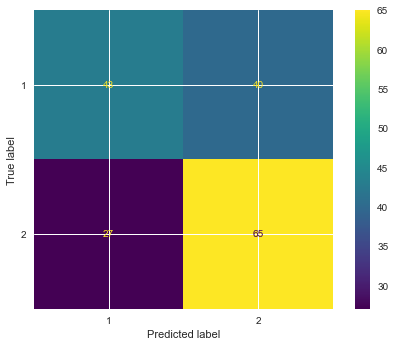

In [51]:
print("Confusion matrix for logistic regression: ")
plot_confusion_matrix(model_gbm, X_test, y_test)  
plt.show()

In [52]:
from sklearn.metrics import accuracy_score

print(metrics.classification_report(y_test, model_gbm.predict(X_test)))

print(accuracy_score(y_test, model_gbm.predict(X_test)))

              precision    recall  f1-score   support

           1       0.61      0.52      0.56        83
           2       0.62      0.71      0.66        92

    accuracy                           0.62       175
   macro avg       0.62      0.61      0.61       175
weighted avg       0.62      0.62      0.61       175

0.6171428571428571


In [53]:
from sklearn.model_selection import KFold, cross_val_score 

k_folds = KFold(n_splits = 5)

scores = cross_val_score(model_gbm, X_test, y_test, cv = k_folds) 
print("Average CV Score: ", scores.mean())

      Iter       Train Loss   Remaining Time 
         1           1.2511           31.94s
         2           1.1443           30.88s
         3           1.0441           30.48s
         4           0.9711           30.76s
         5           0.8829           30.49s
         6           0.8138           30.30s
         7           0.7468           30.43s
         8           0.6986           30.51s
         9           0.6600           30.35s
        10           0.6120           30.07s
        20           0.3157           29.63s
        30           0.1651           28.75s
        40           0.0952           28.19s
        50           0.0527           27.47s
        60           0.0293           26.82s
      Iter       Train Loss   Remaining Time 
         1           1.2708           30.14s
         2           1.1819           29.71s
         3           1.0773           30.08s
         4           0.9853           30.45s
         5           0.8932           30.25s
        

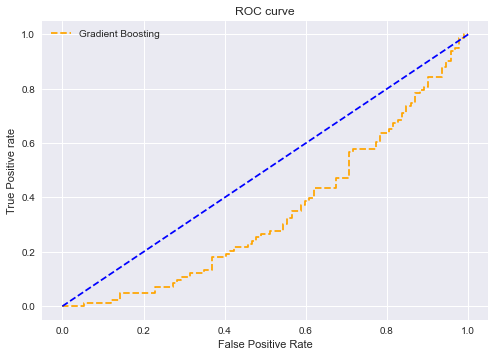

In [54]:
# predict probabilities
pred_prob = model_gbm.predict_proba(X_test)
from sklearn.metrics import roc_curve

# roc curve for models
fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Gradient Boosting')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();